# Traffic Sign Recognition Model
## Environment Initialisation

In [1]:
def IntialiseEnv():
    nb_dir = os.path.split(os.getcwd())[0]
    if nb_dir not in sys.path:
        sys.path.append(nb_dir)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/")
!ls
import os
os.chdir("My Drive/Computer Engineering Masters/Deep Learning_Masters/Deep Learning Project/Source_Code/Model")
!pip install import_ipynb

In [2]:
# Libraries
import os
import sys
import tensorflow as tf
import numpy as np
import math
IntialiseEnv()
import import_ipynb
import pickle
from sklearn.model_selection import train_test_split

from Data_Preparation.Data_Preparation import LoadTrainDataSetWithAugmentation
from Data_Preparation.Data_Preparation import LoadTrainDataSet
from Data_Preparation.Data_Preparation import LoadTestDataSet
from Data_Preparation.Data_Preparation_Belgium import LoadBelgiumTrainDataSet
from Data_Preparation.Data_Preparation_Belgium import LoadBelgiumTestDataSet
from Data_Preparation.Data_Preparation_Belgium import LoadBelgiumTrainDataSetWithAugmentation

importing Jupyter notebook from C:\Users\Owner\Desktop\Cairo University\Masters\Semester 1\Deep Learning\Project\traffic_sign_env\Traffic_Sign_Recognition_Detection\Source_Code\Data_Preparation\Data_Preparation.ipynb
importing Jupyter notebook from C:\Users\Owner\Desktop\Cairo University\Masters\Semester 1\Deep Learning\Project\traffic_sign_env\Traffic_Sign_Recognition_Detection\Source_Code\Pre_Processing\Segmentation.ipynb
importing Jupyter notebook from C:\Users\Owner\Desktop\Cairo University\Masters\Semester 1\Deep Learning\Project\traffic_sign_env\Traffic_Sign_Recognition_Detection\Source_Code\Data_Preparation\Data_Preparation_Belgium.ipynb


## Use GPU/ CPU Configuration 
Tensorflow version 2.0
Prompt to user if CPU/ GPU is in use with device name

In [14]:
# Use GPU/CPU Configurations

import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.0.0
/device:GPU:0
Num GPUs Available:  1


## Reading DataSet
Pre-processing and Loading Train and Test DataSet respectively

In [3]:
def ReadTrainDataSet():
    print("Reading Train Pre-processed DataSet")
    processedTrainDataSet = 'Processed_DataSet/BelgiumTrainDataSet_Aug.pkl'
    isProcessedTrainDataSetExits= os.path.exists(processedTrainDataSet)
    train_image_array, train_image_labels = None, None
    
    if isProcessedTrainDataSetExits:
        print("Loading Processed Train DataSet from Processed_DataSet/BelgiumTrainDataSet_Aug.pkl")
        file = open(processedTrainDataSet, 'rb')
        train_image_array, train_image_labels = pickle.load(file)
        file.close()
        print("Done Loading Train DataSet.")
    else:
        print("Processed_DataSet/BelgiumTrainDataSet_Aug.pkl file does not exist")
        print("Loading Train DataSet ... This may take a while.")
        train_image_array, train_image_labels =  LoadBelgiumTrainDataSetWithAugmentation()
        file = open(processedTrainDataSet, 'wb')
        pickle.dump((train_image_array, train_image_labels), file, protocol=4)
        file.close()
        print("Saving pre-processed train DataSets in Processed_DataSet/BelgiumTrainDataSet_Aug.pkl")
    return train_image_array, train_image_labels    

In [4]:
def ReadTestDataSet():
    processedTestDataSet = 'Processed_DataSet/BelgiumTestDataSet.pkl'
    isProcessedTestDataSetExits= os.path.exists(processedTestDataSet)
    test_image_array, test_image_labels = None, None
    
    if isProcessedTestDataSetExits:
        print("Loading Processed Test DataSet from Processed_DataSet/BelgiumTestDataSet.pkl")
        file = open(processedTestDataSet, 'rb')
        test_image_array, test_image_labels = pickle.load(file)
        file.close()
        print("Done Loading Test DataSet.")
    else:
        print("Processed_DataSet/BelgiumTestDataSet.pkl file does not exist")
        print("Loading Test DataSet ... This may take a while.")
        test_image_array, test_image_labels = LoadBelgiumTestDataSet()
        file = open(processedTestDataSet, 'wb')
        pickle.dump((test_image_array, test_image_labels), file)
        file.close()
        print("Saving pre-processed test DataSets in Processed_DataSet/BelgiumTestDataSet.pkl")
    return test_image_array, test_image_labels

In [5]:
train_image_array, train_image_labels= ReadTrainDataSet()

Reading Train Pre-processed DataSet
Processed_DataSet/BelgiumTrainDataSet_Aug.pkl file does not exist
Loading Train DataSet ... This may take a while.
Directory:  00000
Directory:  00001
Directory:  00002
Directory:  00003
Directory:  00004
Directory:  00005
Directory:  00006
Directory:  00007
Directory:  00008
Directory:  00009
Directory:  00010
Directory:  00011
Directory:  00012
Directory:  00013
Directory:  00014
Directory:  00015
Directory:  00016
Directory:  00017
Directory:  00018
Directory:  00019
Directory:  00020
Directory:  00021
Directory:  00022
Directory:  00023
Directory:  00024
Directory:  00025
Directory:  00026
Directory:  00027
Directory:  00028
Directory:  00029
Directory:  00030
Directory:  00031
Directory:  00032
Directory:  00033
Directory:  00034
Directory:  00035
Directory:  00036
Directory:  00037
Directory:  00038
Directory:  00039
Directory:  00040
Directory:  00041
Directory:  00042
Directory:  00043
Directory:  00044
Directory:  00045
Directory:  00046
Dir

In [6]:
print(train_image_array.shape)

(9576, 60, 60, 1)


In [7]:
test_image_array, test_image_labels= ReadTestDataSet()

Loading Processed Test DataSet from Processed_DataSet/BelgiumTestDataSet.pkl
Done Loading Test DataSet.


In [8]:
print(test_image_array.shape)

(2520, 60, 60, 1)


## Train-Split 
Split Train images dataset into two splits: training and validation respectively 90-10

In [9]:
image_train, image_valid,label_train, label_valid = train_test_split(train_image_array, train_image_labels,stratify=train_image_labels,test_size=0.1,random_state=43)

In [10]:
print(image_train.shape)

(8618, 60, 60, 1)


In [11]:
del train_image_array
del train_image_labels

## Hyper-parameters Tuning

In [12]:
# Hyper-parameters tuning
kernel_1 = (5,5)
kernel_2 = (3,3)
pooling = (2,2)
dropout = 0.2
num_classes = 62

## Model Architecture

In [25]:
def model1():
    model = None
    tf.initializers.Orthogonal(gain=1.0, seed=None)
    
    layers = [
        tf.keras.layers.Conv2D(32,kernel_2, input_shape=(60,60,1), strides = 1, padding='valid',activation = tf.nn.relu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32,kernel_2, activation = tf.nn.relu),
        tf.keras.layers.MaxPool2D(pooling),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(128,kernel_2, strides = 1, padding='valid', activation = tf.nn.relu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128,kernel_2,  activation = tf.nn.relu),
        tf.keras.layers.MaxPool2D(pooling),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(256,kernel_2, strides = 1, padding='valid', activation = tf.nn.relu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256,kernel_2,  activation = tf.nn.relu),
        tf.keras.layers.MaxPool2D(pooling),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.BatchNormalization(),

       
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = tf.nn.relu),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(num_classes, activation = 'softmax')
    ]
    
    model = tf.keras.Sequential(layers)
    return model

## Model Optimizer 

In [26]:
from tensorflow import keras
model = model1()

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=2000,
    decay_rate=0.8)

optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
model.compile(optimizer= optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

## Model Training

In [ ]:
history = model.fit(image_train, np.array(label_train), batch_size=64, epochs=15, validation_data=(image_valid, np.array(label_valid)))

Train on 8618 samples, validate on 958 samples
Epoch 1/15
8618/8618 [==============================] - 76s 9ms/sample - loss: 1.4125 - sparse_categorical_accuracy: 0.6681 - val_loss: 3.4232 - val_sparse_categorical_accuracy: 0.2328
Epoch 2/15
8618/8618 [==============================] - 69s 8ms/sample - loss: 0.4048 - sparse_categorical_accuracy: 0.8827 - val_loss: 1.4896 - val_sparse_categorical_accuracy: 0.6044
Epoch 3/15
8618/8618 [==============================] - 69s 8ms/sample - loss: 0.2131 - sparse_categorical_accuracy: 0.9355 - val_loss: 0.2787 - val_sparse_categorical_accuracy: 0.9269
Epoch 4/15
8618/8618 [==============================] - 67s 8ms/sample - loss: 0.1316 - sparse_categorical_accuracy: 0.9595 - val_loss: 0.1826 - val_sparse_categorical_accuracy: 0.9436
Epoch 5/15
2240/8618 [======>.......................] - ETA: 48s - loss: 0.1110 - sparse_categorical_accuracy: 0.9701

## Model Evaluation

In [23]:
model.evaluate(test_image_array, np.array(test_image_labels), batch_size=256)

2520/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.15727041030213945, 0.9722222]

## Visualization

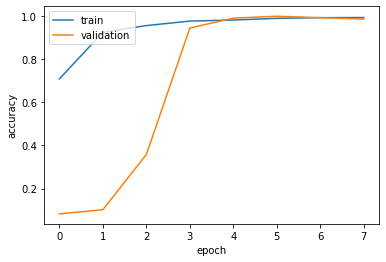

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

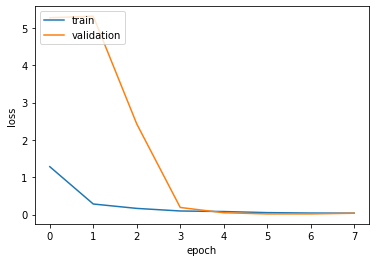

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Model Summary 
Number of parameters used in the model architecture

In [ ]:
print(model.summary())

## Saving Trained .h5 Model

In [43]:
def saveCNNModel(model_name):
    model.save(model_name)

In [79]:
saveCNNModel('belgium_9758.h5')

In [ ]:
model._set_inputs(image_train,np.array(label_train))

## Loading Saved Trained .h5 Model

In [ ]:
def load_model():
    Model = tf.keras.models.load_model('Trained_Models/winning_model_9925.h5')
    return Model

In [ ]:
del model
model= load_model()

## Computation Avg. Processing Time

In [ ]:
import time
t1=time.time()
model.predict(test_image_array)
t2=time.time()
print("Average Processing time: ", ((t2-t1)/12630)*1000, " ms")